In [1]:
# IMPORTING LIBRARIES AND DEPENDENCIES:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

from tqdm.auto import tqdm
from sklearn.metrics import mean_squared_error

# from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from category_encoders import TargetEncoder

from sklearn.feature_selection import SelectFromModel


from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import optuna

import tqdm
import pickle
from sklearn.feature_extraction import DictVectorizer



pd.set_option('display.max_columns', 70)
plt.rcParams['axes.spines.top']=False
plt.rcParams['axes.spines.right']=False

style.use('ggplot')
sns.set_palette('Set2')
# blue, orange, green

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Getting the Dataset

In [2]:
train = pd.read_csv('./data/train_dataset.csv')
test = pd.read_csv('./data/x_test.csv')

In [3]:
df_train = train.copy()
df_test = test.copy()

In [7]:
print(df_train.shape)
print(df_test.shape)

(75757, 64)
(9705, 63)


In [52]:
df_train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [4]:
df_train.columns = df_train.columns.str.lower()
df_test.columns = df_test.columns.str.lower()

In [54]:
df_train.columns

Index(['year_factor', 'state_factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'elevation',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

## EDA

## Understanding features

**year_Factor**: anonymized year in which the weather and energy usage factors were observed  

**state_Factor**: anonymized state in which the building is located  

**building_class**: building classification  

**facility_type**: building usage type  

**floor_area**: floor area (in square feet) of the building  

**year_built**: year in which the building was constructed  

**energy_star_rating**: the energy star rating of the building  

**elevation**: elevation of the building location  

**january_min_temp**: minimum temperature in January (in Fahrenheit) at the location of the building  

**january_avg_temp**: average temperature in January (in Fahrenheit) at the location of the building  

**january_max_temp**: maximum temperature in January (in Fahrenheit) at the location of the building  

[Similarly for all other months]

**cooling_degree_days**: cooling degree day for a given day is the number of degrees where the daily average temperature   
exceeds 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.  

**heating_degree_days**: heating degree day for a given day is the number of degrees where the daily average temperature   falls under 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.  

**precipitation_inches**: annual precipitation in inches at the location of the building  

**snowfall_inches**: annual snowfall in inches at the location of the building  

**snowdepth_inches**: annual snow depth in inches at the location of the building  

**avg_temp**: average temperature over a year at the location of the building  

**days_below_30F**: total number of days below 30 degrees Fahrenheit at the location of the building  

**days_below_20F**: total number of days below 20 degrees Fahrenheit at the location of the building  

**days_below_10F**: total number of days below 10 degrees Fahrenheit at the location of the building  

**days_below_0F**: total number of days below 0 degrees Fahrenheit at the location of the building  

**days_above_80F**: total number of days above 80 degrees Fahrenheit at the location of the building  

**days_above_90F**: total number of days above 90 degrees Fahrenheit at the location of the building  

**days_above_100F**: total number of days above 100 degrees Fahrenheit at the location of the building  

**days_above_110F**: total number of days above 110 degrees Fahrenheit at the location of the building  

**direction_max_wind_speed**: wind direction for maximum wind speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).  

**direction_peak_wind_speed**: wind direction for peak wind gust speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).  

**max_wind_speed**: maximum wind speed at the location of the building  

**days_with_fog**: number of days with fog at the location of the building  

**building_id**: building id  

### Target
**site_eui**: Site Energy Usage Intensity is the amount of heat and electricity consumed by a building as reflected in utility bills  

In [55]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year_factor                75757 non-null  int64  
 1   state_factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   elevation                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [56]:
df_train.dtypes.value_counts()

int64      37
float64    24
object      3
dtype: int64

In [57]:
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
0


In [58]:
print([col for col in df_train if df_train[col].nunique()==1])
print([col for col in df_test if df_test[col].nunique()==1])

[]
['year_factor', 'days_above_110f']


In [15]:
def missing_values_table(df):
        # Total missing values by column
        mis_val = df.isnull().sum()
        
        # Percentage of missing values by column
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # build a table with the columns
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [16]:
print("Train set columns with null values: ")
print(list(df_train.columns[df_train.isnull().any()]))
print('===========================================')
# Missing values for training data
missing_values_train = missing_values_table(df_train)
missing_values_train[:20].style.background_gradient(cmap='Reds')

Train set columns with null values: 
['year_built', 'energy_star_rating', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']
Your selected dataframe has 64 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
days_with_fog,45796,60.500000
direction_peak_wind_speed,41811,55.200000
direction_max_wind_speed,41082,54.200000
max_wind_speed,41082,54.200000
energy_star_rating,26709,35.300000
year_built,1837,2.400000


In [15]:
print("Test set columns with null values: ")
print(list(df_test.columns[df_test.isnull().any()]))
print('===========================================')
# Missing values for test data
missing_values_test = missing_values_table(df_test)
missing_values_test[:20].style.background_gradient(cmap='Reds')

Test set columns with null values: 
['year_built', 'energy_star_rating', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']
Your selected dataframe has 63 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
days_with_fog,9117,93.900000
direction_max_wind_speed,8575,88.400000
direction_peak_wind_speed,8575,88.400000
max_wind_speed,8575,88.400000
energy_star_rating,2254,23.200000
year_built,92,0.900000


### Observations:   
   
1) `year_built`, `energy_star_rating`, `direction_max_wind_speed`, `direction_peak_wind_speed`, `max_wind_speed`, `days_with_fog` variables have `NA` values.   
2) Data contains 75757 samples and 64 features. We have 3 categorical and rest numerical features. Target is numerical.   
3) There are no duplicates in individual dataset, however there might be duplicates in the combined version   
4) there are no constant columns in train dataset, but test dataset has 2 constant columns   

### Combining the datasets for visualization

In [9]:
test['site_eui'] = np.nan #63
test['dataset'] = 'test'
train['dataset'] = 'train'


df_all = pd.concat([train, test], axis=0, ignore_index=True)

The dataset contains time variable, `Year_Factor`, that has values from 1 to 7. Assuming the values are consecutive years,`train` dataset contains the first 6 years and `test` set contains the 7th year.

In [10]:
df_all.columns = df_all.columns.str.lower()

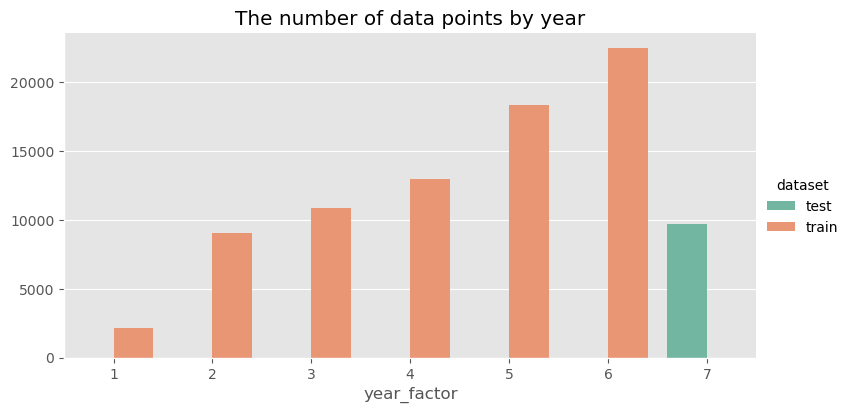

In [18]:
ax = sns.catplot(x='year_factor', 
                 y='id', 
                 data=df_all.groupby(['dataset','year_factor']).agg({'id':'count'}).reset_index(),
                 hue='dataset',
                 kind='bar',
                 aspect=2,
                 height=4)\
.set(title="The number of data points by year",
     ylabel=None)

`train` set contains data points of 7 states, however, `test` doesn't have any data point from `State_6`.

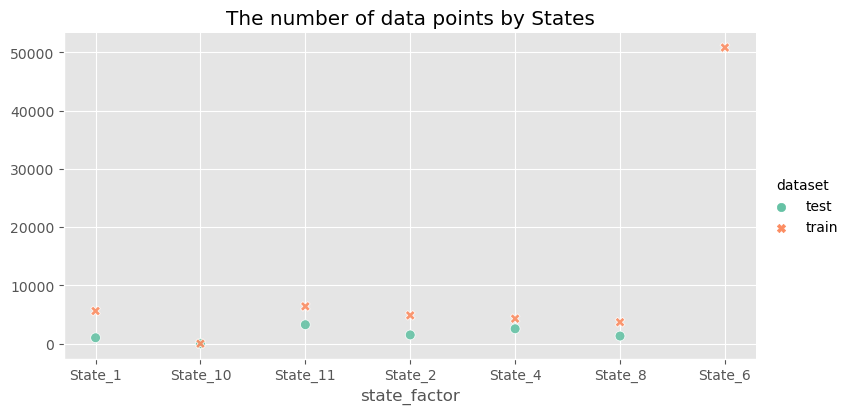

In [19]:
ax = sns.relplot(x='state_factor', 
                 y='id', 
                 data=df_all.groupby(['dataset','state_factor']).agg({'id':'count'}).reset_index(),
                 hue='dataset',
                 style='dataset',
                 aspect=2,
                 height=4,
                 s=50,
                 alpha=0.9
                )\
.set(title = "The number of data points by States",
    ylabel=None)

Both residential and commercial buildings are present in both datasets. `train` data contains more residential buildings compared to `test` set which is due to the number of `State_6` buildings in `train` set which seems to add to the number. Apart from `State_6`, the number of commercial buildings are higher than the residential buildings and `State_10` only contains commercial buildings. The type of building and state could be important factors in determining `EUI`.

Text(0.5, 0, '')

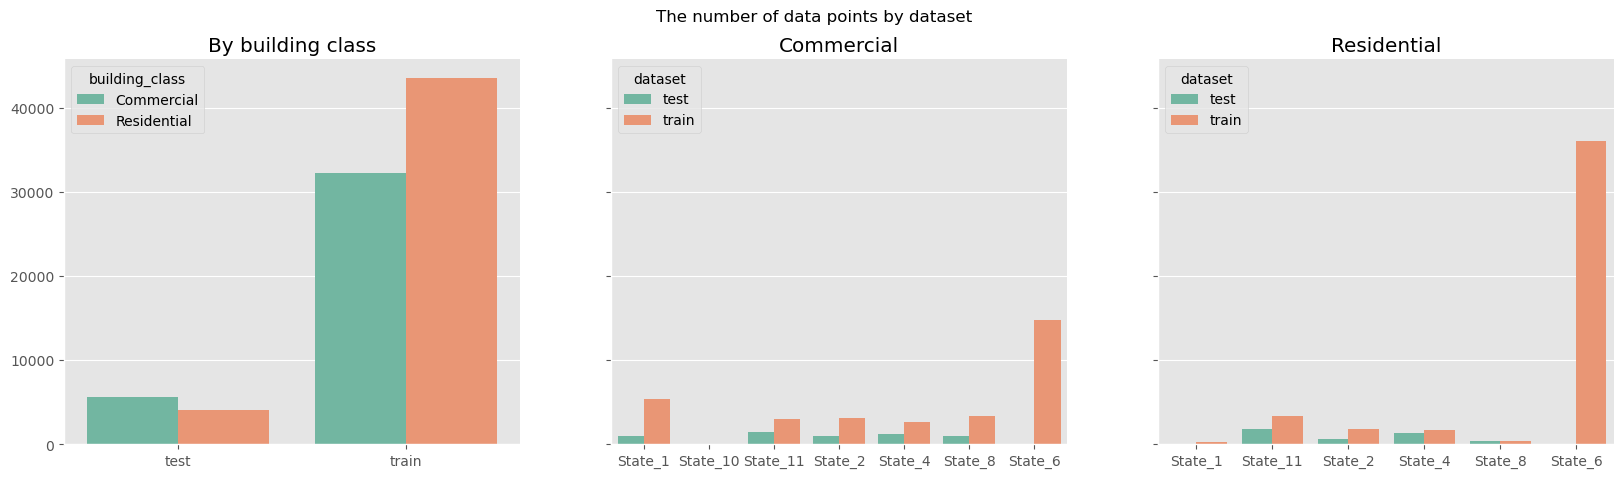

In [20]:
fig, ax = plt.subplots(1,3, figsize=(20,5), sharey=True)
fig.suptitle("The number of data points by dataset")

sns.barplot(x='dataset',
            y='id',
            data=df_all.groupby(['dataset','building_class']).agg({'id':'count'}).reset_index(),
            hue='building_class',
            ax=ax[0],
            ci=False)

for e, s in enumerate(df_all['building_class'].unique(),1):
    sns.barplot(x='state_factor',
                y='id',
                data=df_all[df_all['building_class']==s].groupby(['dataset','state_factor']).agg({'id':'count'}).reset_index(),
                hue='dataset',
                ax=ax[e],
                ci=False)
    ax[e].set_title(s)
    ax[e].set_ylabel("")
    ax[e].set_xlabel("")

ax[0].set_title("By building class")
ax[0].set_ylabel("")
ax[0].set_xlabel("")

All facility types are present in both datasets. Almost 90% of residential `Multifamily_uncategorized` buildings and 50% of `Office_uncategorized` are in `State_6` of the training set. Not quite sure how `State_6` will affect the model learning and prediction.

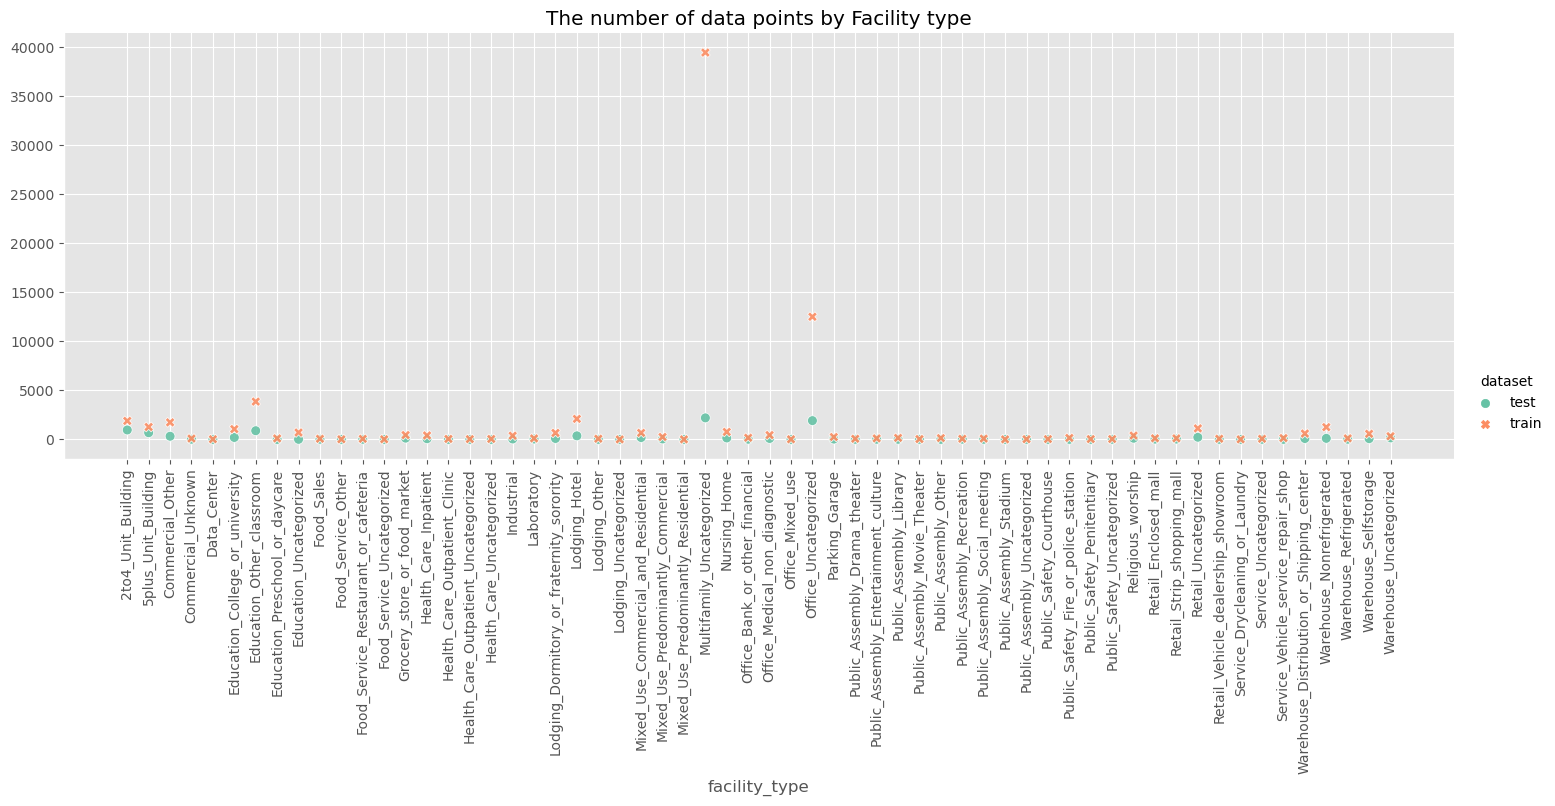

In [21]:
ax = sns.relplot(x='facility_type', 
                 y='id', 
                 data=df_all.groupby(['dataset','facility_type']).agg({'id':'count'}).reset_index(),
                 hue='dataset',
                 style='dataset',
                 aspect=3,
                 height=5,
                 s=50,
                 alpha=0.9
                )\
.set(title = "The number of data points by Facility type",
    ylabel=None)

ax.set_xticklabels(rotation=90) 
None

The oldest building was built in 1600 and the latest in 2016. The majority of the buildings were built since 1900. There were some 0 and null values. Not quite sure what 0 signifies.

In [61]:
df_all['year_built'].value_counts().index.sort_values()

Float64Index([   0.0, 1600.0, 1649.0, 1732.0, 1756.0, 1789.0, 1799.0, 1800.0,
              1811.0, 1815.0,
              ...
              2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0,
              2015.0, 2016.0],
             dtype='float64', length=183)

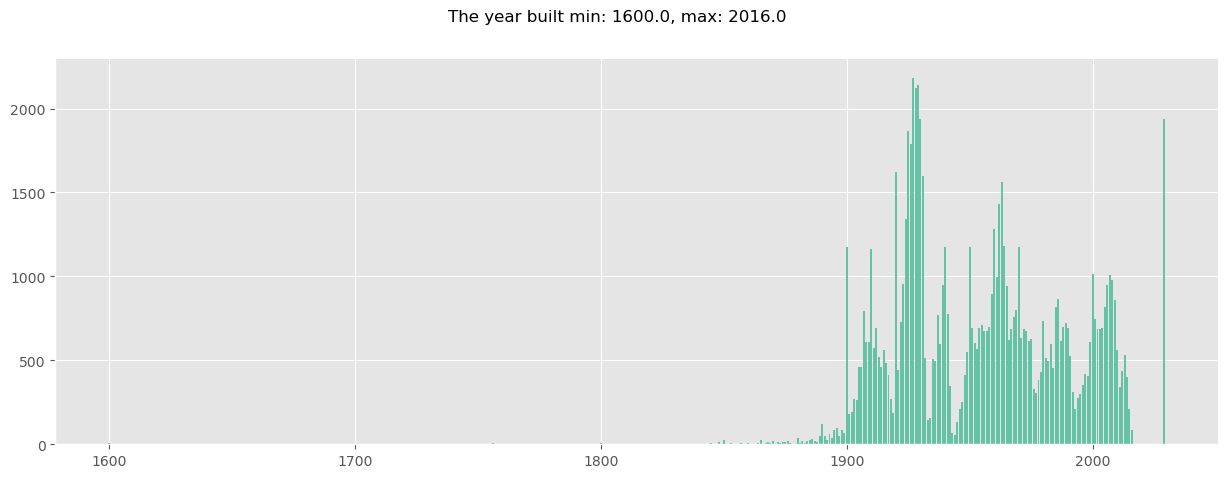

In [23]:
temp = df_all[['year_built']].fillna(2029).replace({0:2029}).astype('category').value_counts().reset_index().rename({0:'count'},axis=1)\
            .sort_values('year_built')

fig, ax = plt.subplots(figsize=(15,5))

ax=plt.bar(temp['year_built'],
           temp['count']
          )


fig.suptitle(f"The year built min: {min(temp['year_built'])}, max: {max(df_all['year_built'])}");

`train` set buildings have higher floor areas compared to `test` set buildings and small positive correlation between `floor_area` and `energy_star_rating` can be observable. 

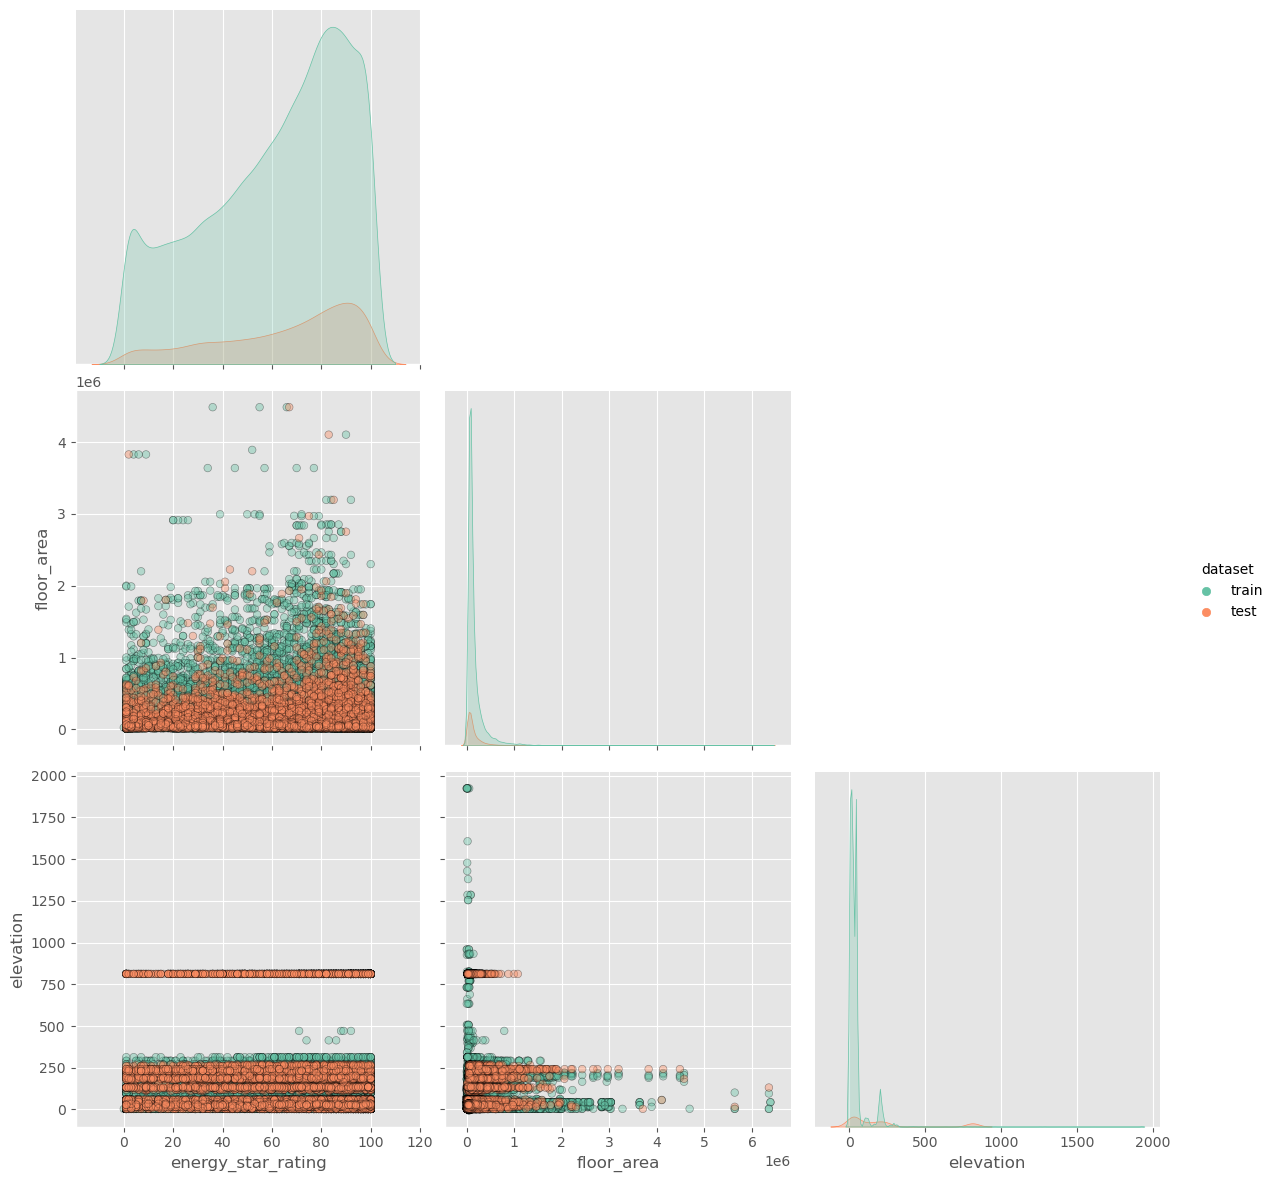

In [24]:
sns.pairplot(df_all,
            vars=['energy_star_rating','floor_area','elevation'], 
            hue='dataset',
            height=4,
            plot_kws = {'alpha': 0.4, 's': 30, 'edgecolor': 'k'},
            corner=True
           );

According to the average temperature (`avg_temp`), if we list states from warmest to coldest: State 1, State 10, State 2, and State 8. The range of temperatures of State1, State 6,  State 11 and State 4 are higher compared to the other states. 

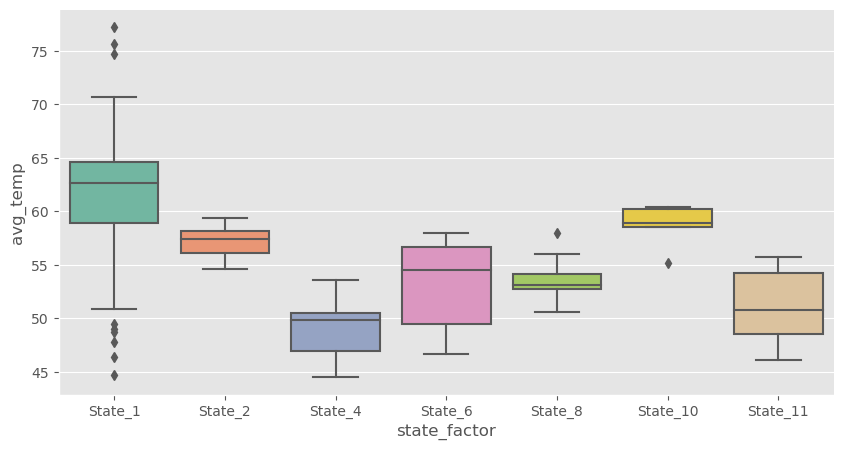

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=df_all[['avg_temp','state_factor']].drop_duplicates(), y='avg_temp', x='state_factor');


Each month has unique temperature values between 31 and 59 which means the values in temperature volumes are highly repeated for the data points.

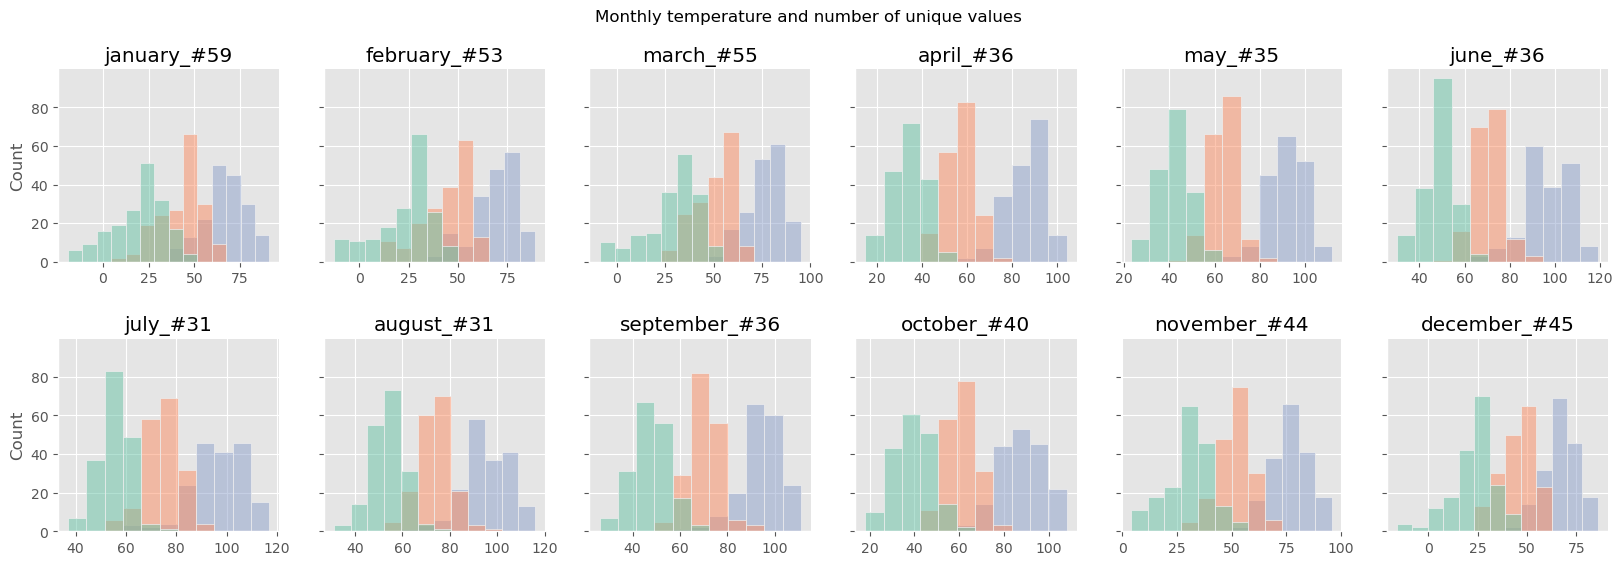

In [26]:
cols = [['january_min_temp', 'january_avg_temp', 'january_max_temp'],
        ['february_min_temp', 'february_avg_temp', 'february_max_temp'],
        ['march_min_temp', 'march_avg_temp', 'march_max_temp'], 
        ['april_min_temp','april_avg_temp', 'april_max_temp'], 
        ['may_min_temp', 'may_avg_temp','may_max_temp'], 
        ['june_min_temp', 'june_avg_temp', 'june_max_temp'],
        ['july_min_temp', 'july_avg_temp', 'july_max_temp'], 
        ['august_min_temp','august_avg_temp', 'august_max_temp'], 
        ['september_min_temp','september_avg_temp', 'september_max_temp'], 
        ['october_min_temp','october_avg_temp', 'october_max_temp'], 
        ['november_min_temp','november_avg_temp', 'november_max_temp'], 
        ['december_min_temp','december_avg_temp', 'december_max_temp']]
        
fig, ax = plt.subplots(2, 6, figsize=(20,6), sharey=True)
fig.suptitle("Monthly temperature and number of unique values")

for e, c in enumerate(cols):
    if e<=5:
        sns.histplot(df_all[c].drop_duplicates(), ax=ax[0,e], legend=False)\
        .set(title=c[0][:c[0].find('_')]+ '_#'+str(len(df_all[c[0]].unique())))
    else:
        sns.histplot(df_all[c].drop_duplicates(), ax=ax[1,e-6], legend=False)\
        .set(title=c[0][:c[0].find('_')]+ '_#'+str(len(df_all[c[0]].unique())))
        
plt.subplots_adjust(hspace=0.4)

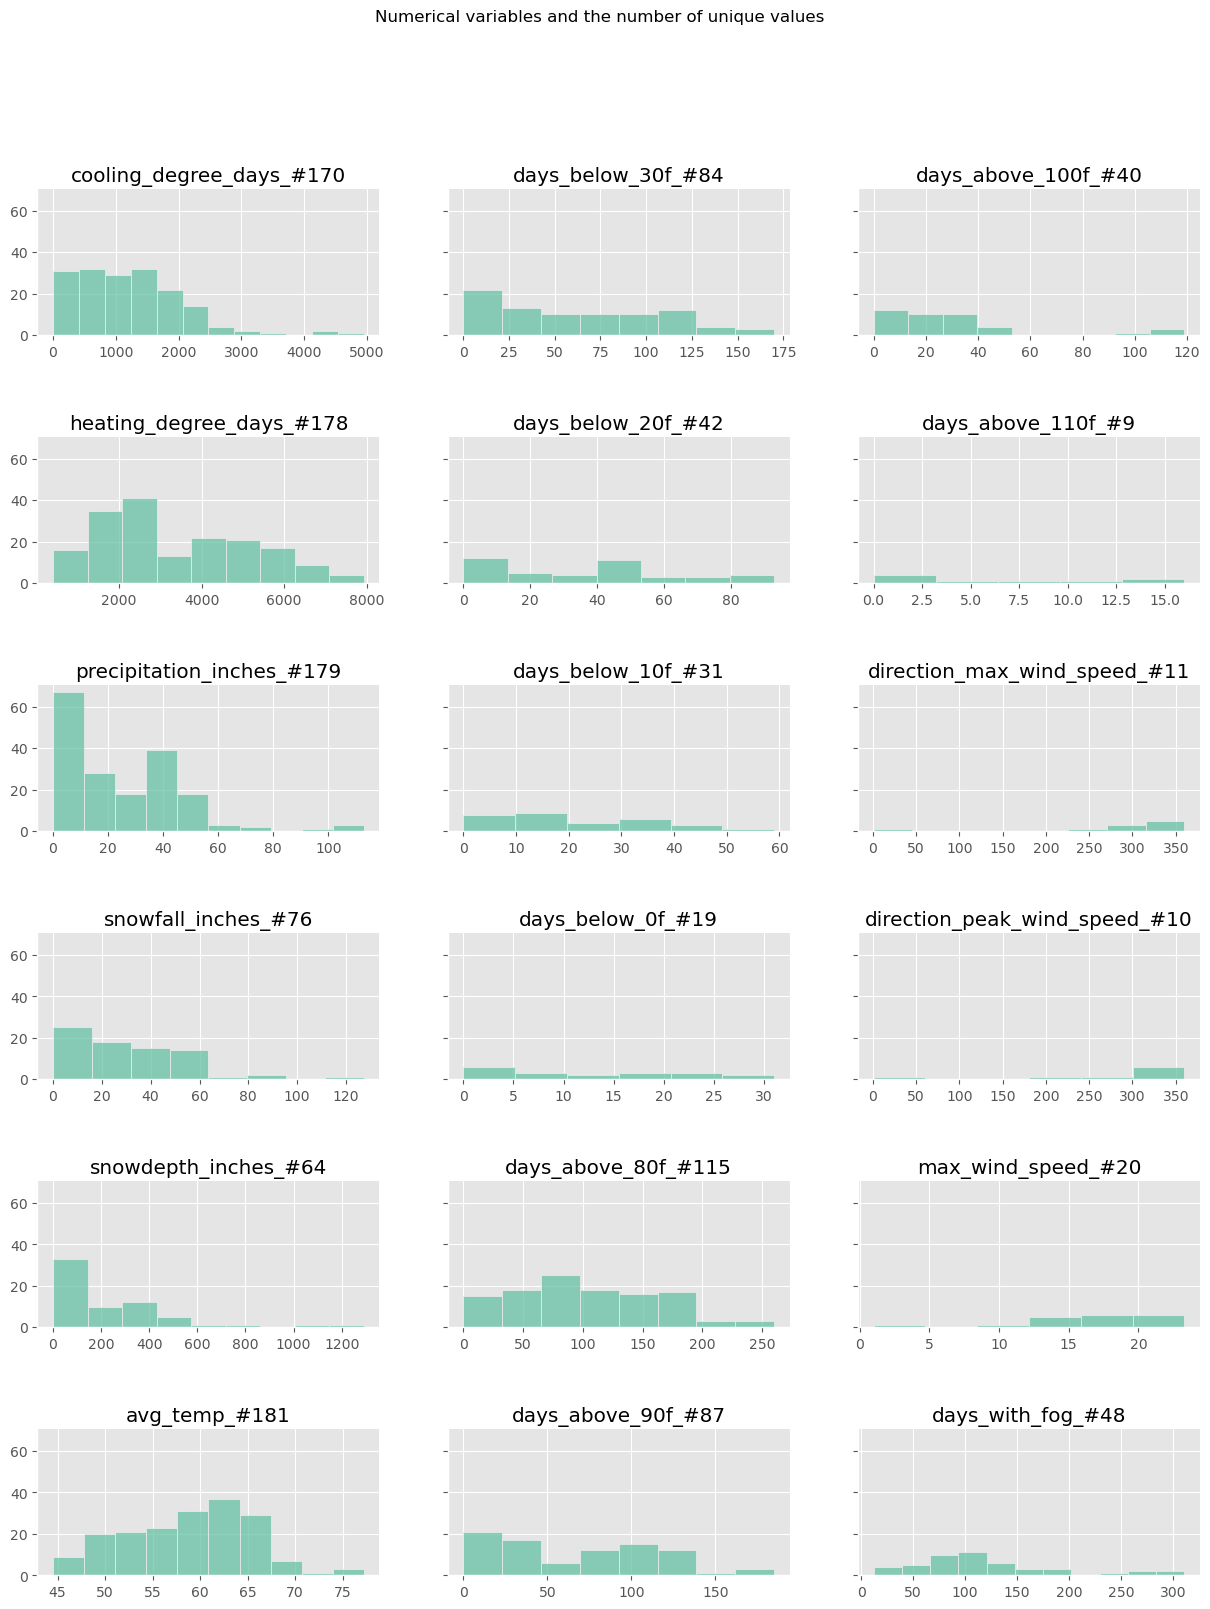

In [27]:
cols=['cooling_degree_days','heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30f', 'days_below_20f',
       'days_below_10f', 'days_below_0f', 'days_above_80f', 'days_above_90f',
       'days_above_100f', 'days_above_110f', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']

fig, ax = plt.subplots(6,3, figsize=(15,18), sharey=True)
fig.suptitle("Numerical variables and the number of unique values")

for e, c in enumerate(cols):
    if e<=5:
        sns.histplot(df_all[c].drop_duplicates(), ax=ax[e,0], legend=False)\
        .set(title=c+"_#"+str(len(df_all[c].unique())), ylabel=None, xlabel=None)
    elif (e>=6) & (e<=11):
        sns.histplot(df_all[c].drop_duplicates(), ax=ax[e-6,1], legend=False)\
        .set(title=c+"_#"+str(len(df_all[c].unique())), ylabel=None, xlabel=None)
    else:
        sns.histplot(df_all[c].drop_duplicates(), ax=ax[e-12,2], legend=False)\
        .set(title=c+"_#"+str(len(df_all[c].unique())), ylabel=None, xlabel=None)
        
plt.subplots_adjust(hspace=0.7)

### Target Variable Exploration (EUI)

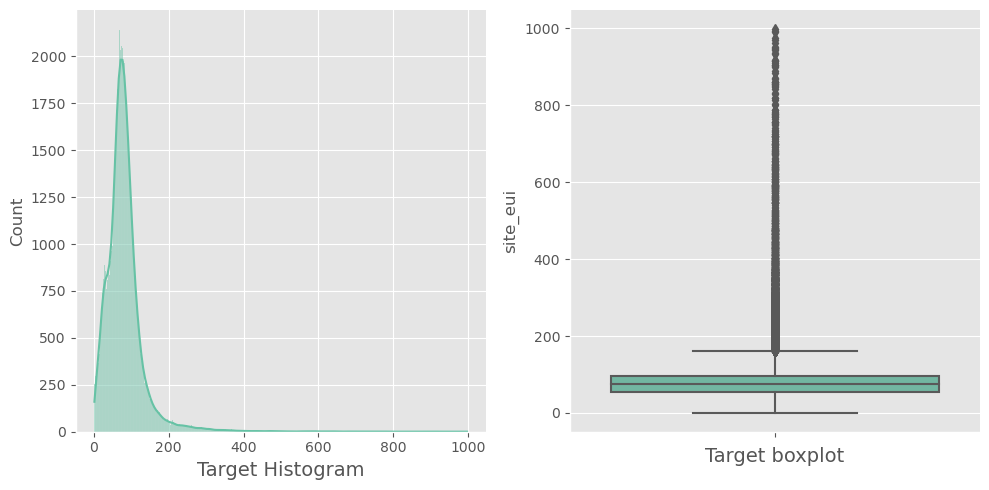

In [28]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
cp = sns.histplot(x=df_all['site_eui'], kde=True, palette='Set2')
ax1.set_xlabel('Target Histogram', fontsize=14)
ax2 = plt.subplot(1,2,2)
sns.boxplot(y=df_all['site_eui'], palette='Set2')
ax2.set_xlabel('Target boxplot', fontsize=14)
plt.tight_layout();

State 2 and 4 have slightly higher EUI and State 11 and 8 have lower EUI level.

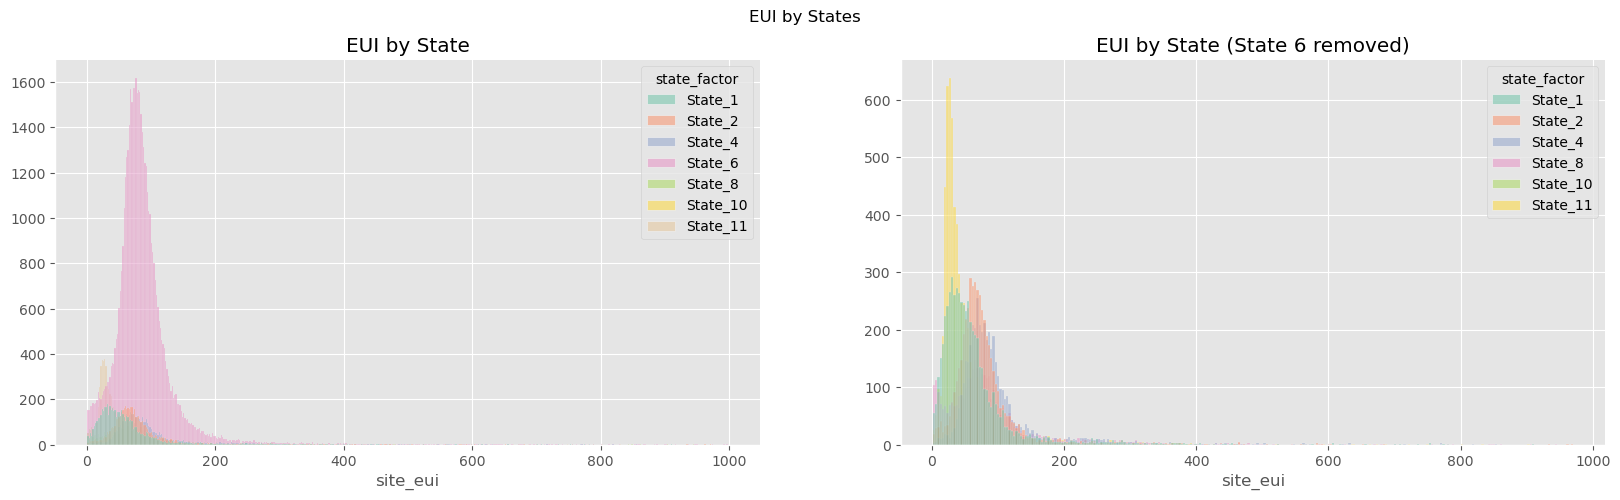

In [29]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
fig.suptitle("EUI by States")

sns.histplot(df_all, x='site_eui',hue='state_factor', ax=ax[0])\
.set(title='EUI by State', ylabel=None)

sns.histplot(df_all[df_all['state_factor']!='State_6'], x='site_eui', hue='state_factor', ax=ax[1])\
.set(title='EUI by State (State 6 removed)', ylabel=None);

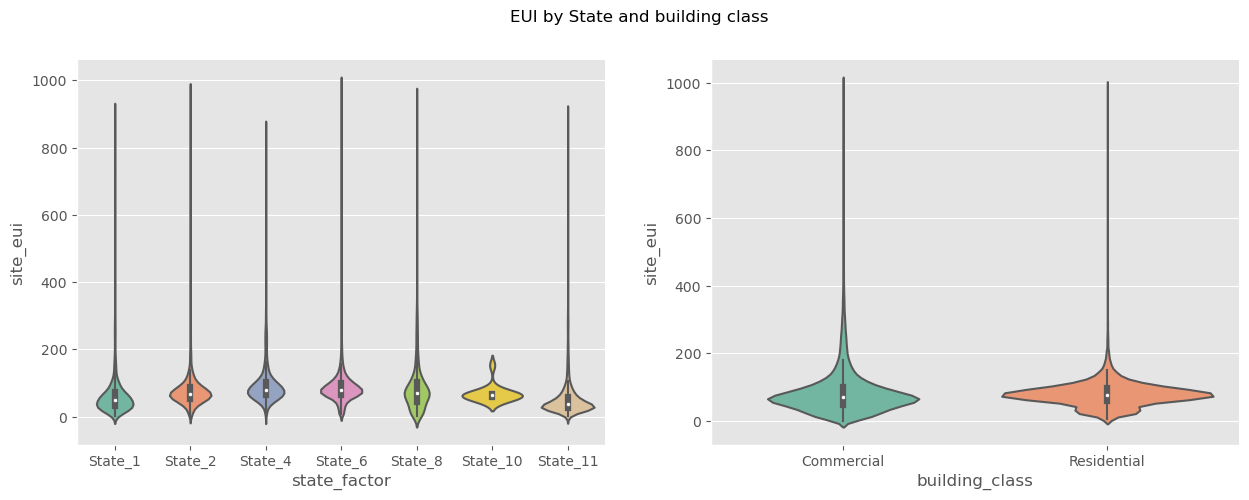

In [30]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("EUI by State and building class")

sns.violinplot(data=df_all, y='site_eui', x='state_factor', ax=ax[0])
sns.violinplot(data=df_all, y='site_eui', x='building_class', ax=ax[1]);

Labs and Data Centers have higher EUI compared to the other types of buildings. Grocery stores, Health Care Inpatient, Health Care Uncategorized, Health Care Outpatient, and Food service, restaurants have higher range of EUI. It could be the essential services must operate for longer hours, therefore, have higher EUI.

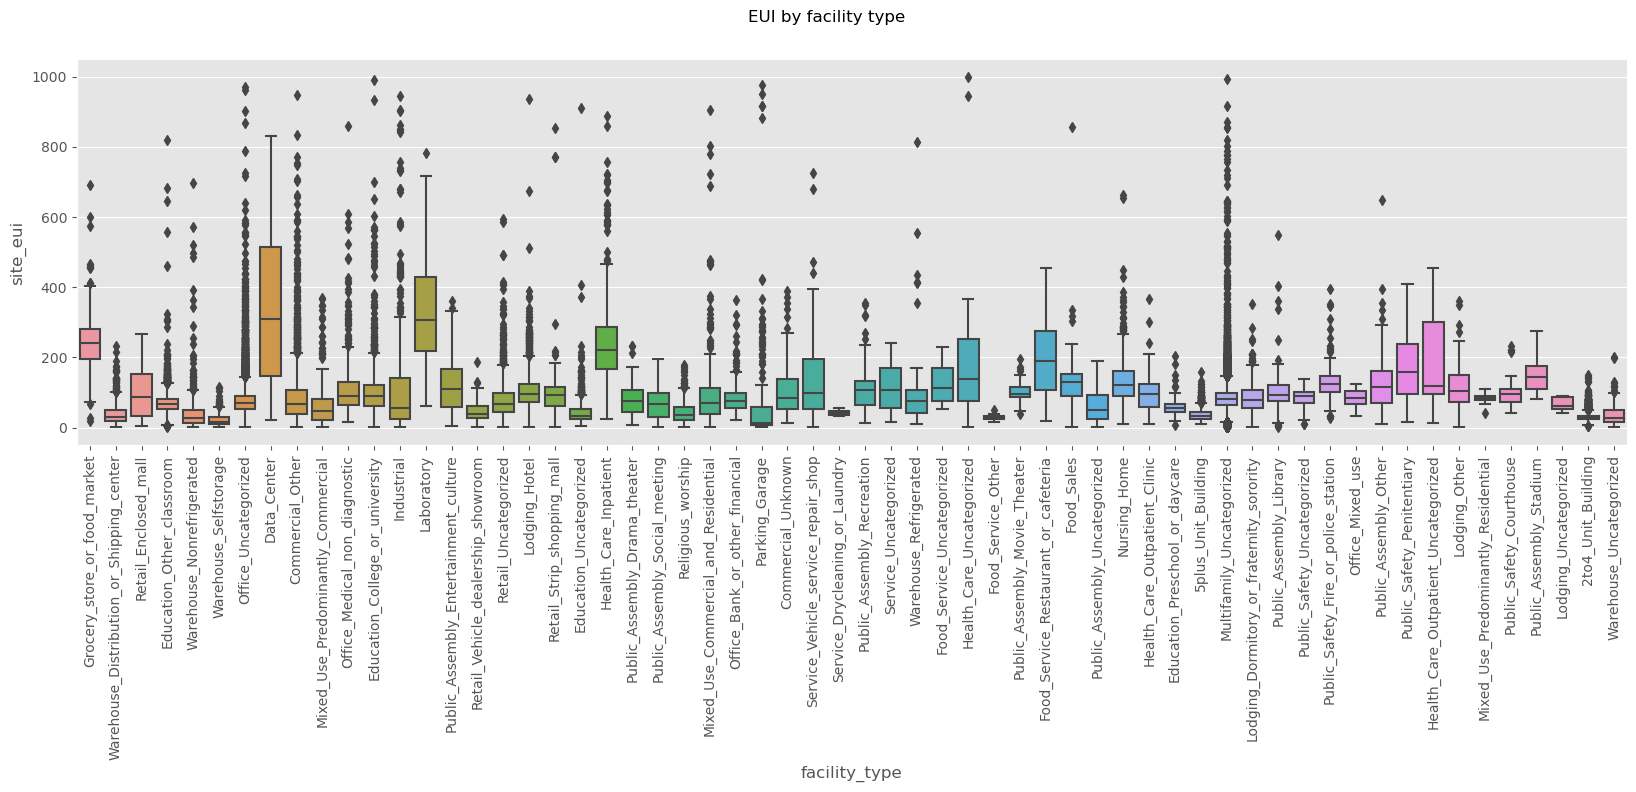

In [31]:
fig, ax = plt.subplots(figsize=(20,5))
fig.suptitle("EUI by facility type")
ax=sns.boxplot(data=df_all, y='site_eui', x='facility_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

`floor_area` could have positive relationship with `EUI`. The younger buildings tend to have higher `EUI` which could be because building height and size have increased over the years. It looks like the Higher the `energy_star_rating` is, the lower the `EUI` becomes.

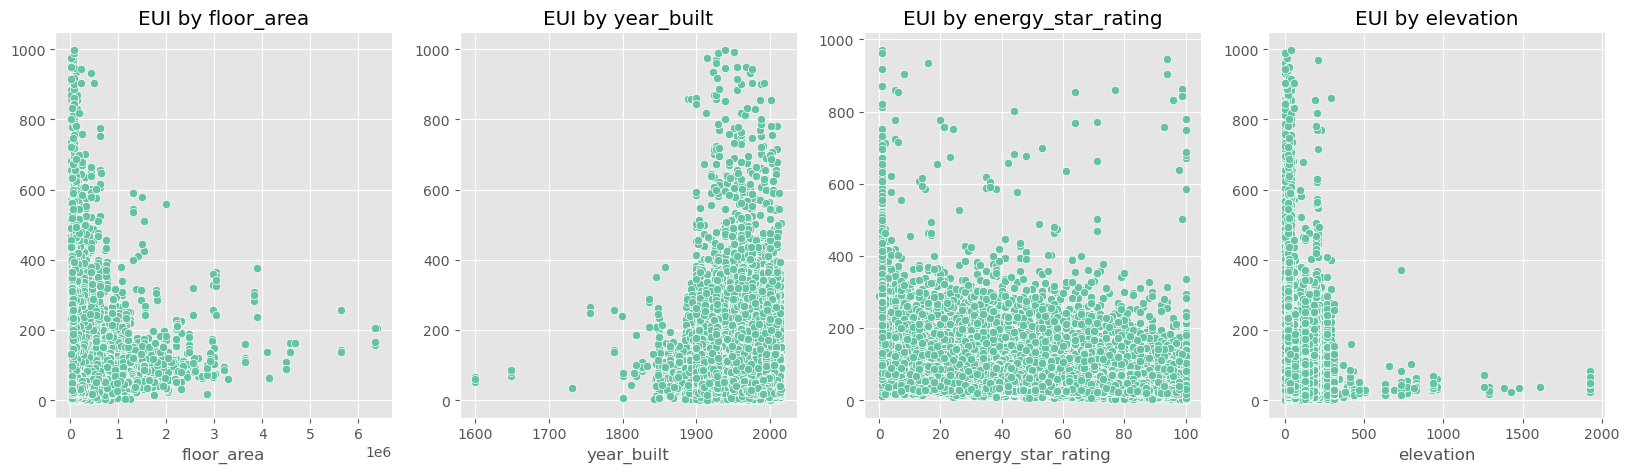

In [32]:
fig, ax = plt.subplots(1,4, figsize=(20,5))

for e, col in enumerate(['floor_area', 'year_built', 'energy_star_rating', 'elevation']):
    if col =='year_built':
        sns.scatterplot(data=df_all[(df_all['year_built']!=0) & (df_all['year_built'].notna())], 
                        x=col, y='site_eui', ax=ax[e]).set(title='EUI by '+ col, ylabel=None)
    else:
        sns.scatterplot(data=df_all, x=col, y='site_eui', ax=ax[e]).set(title='EUI by '+ col, ylabel=None);

The most data points are in lower number of `cooling_degree_days` and higher number of `heating_degree_days`. The majority of the datapoints are also in the lower levels of `snowfall_inches` and `snowdepth_inches`. `direction_max_wind_speed`, `direction_peak_wind_speed`, `max_wind_speed`, and `days_with_fog` columns have the `NA` values of over 50%. No relationship between `EUI` and the weather related numerica columns can be observed from the plot.

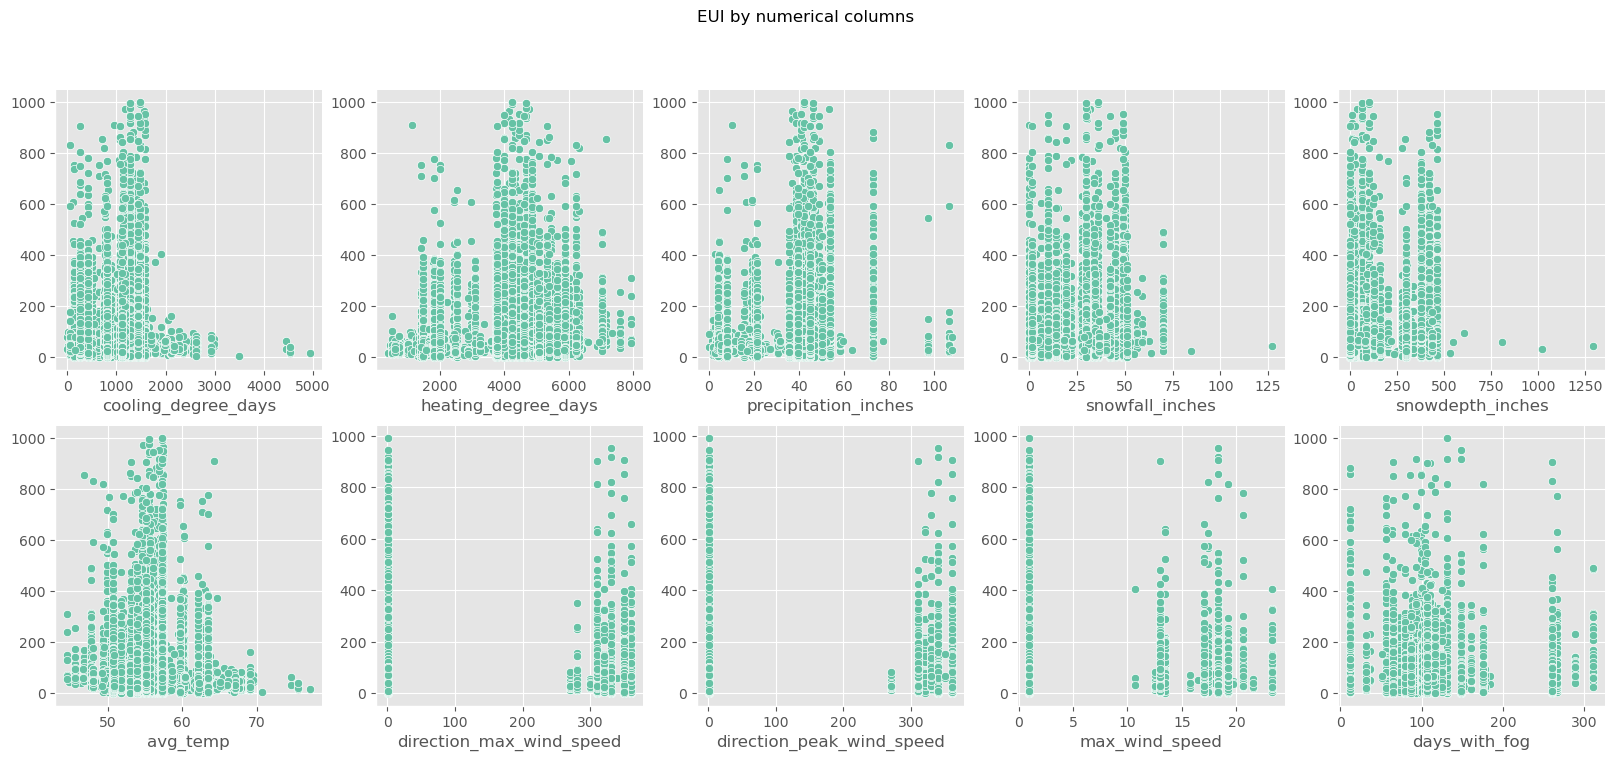

In [33]:
cols=[['cooling_degree_days','heating_degree_days', 'precipitation_inches', 
      'snowfall_inches','snowdepth_inches'], 
      ['avg_temp', 
      'direction_max_wind_speed','direction_peak_wind_speed', 'max_wind_speed', 
      'days_with_fog']]

fig, ax = plt.subplots(2,5, figsize=(20,8))
fig.suptitle('EUI by numerical columns')

for e1, l in enumerate(cols):
    for e2, col in enumerate(l):
        sns.scatterplot(data=df_all, 
                        x=col, y='site_eui', ax=ax[e1, e2]).set(ylabel=None);

### Observations

- Categorical variables such as `State_Factor`, `building_class` and `facility_type` might have some correlation with `EUI`.
- `State_6` is not present in `test` set. State 6 should be removed from the training data and then should be tested.
- `floor_area`, `energe_star_rating` should be included in the modelling to be tested.
- From the plots, it's difficult to observe direct (linear) relationship between `EUI` and weather related variables. However, this doesn't deny non-linear relationships among the variables.
- Variables with more than 50% `NA` values should not be imputed (in my opinion) and better to be not included in the training set.
- Weather variables have few unique values repeated throughout the datapoints. Not sure how this duplicated values might affect the modeling and prediction.

### Preprocessing

we will suppose that two  if two buildings have the same values for these features;   
they are the same building, in other words groupby_cols = (building_id)


Removing duplicates by clubbing similar building data

In [11]:
groupby_cols = ['state_factor','building_class','facility_type','floor_area','year_built']
df_all = df_all.sort_values(by=groupby_cols+['year_factor']).reset_index(drop=True)

In [12]:
df_all.loc[:,df_all.dtypes=='object'].columns

Index(['state_factor', 'building_class', 'facility_type', 'dataset'], dtype='object')

Null imputation for categorical values: **KNN Imputing**

In [64]:
df_all.shape

(85462, 65)

In [13]:
# This takes 1 hr, hence, unpickle the df1 and carry on with knn_imputing = False
knn_imputing = False
target='site_eui'

if knn_imputing:
    imputer = KNNImputer(n_neighbors=7)
    tmp = df_all[['state_factor', 'building_class', 'facility_type', 'dataset', target]]
    df = df_all.drop(tmp.columns, axis=1)
    df1 = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
    
    tmp.to_csv('data/imputer_tmp_v1.csv', index=False)
    df1.to_csv('data/imputer_df1_v1.csv', index=False)
    
    with open('models/knn_imputer.pkl', 'wb') as f_out:
        pickle.dump(imputer, f_out)

else:
    df1 = pd.read_csv('data/imputer_df1_v1.csv')
    tmp = df_all[['state_factor', 'building_class', 'facility_type', 'dataset', target]]
    df_all = df_all.drop(tmp.columns, axis=1)
    
    for col in tmp.columns:
        df_all[col]=tmp[col]
    for col in df1.columns: 
        df_all[col] = df1[col]

In [14]:
df_all.shape

(85462, 65)

## Feature Engineering

### Weather based features

we will extract new weather statistics from the building location weather features

In [15]:
# extract new weather statistics from the building location weather features
temp = [col for col in df_all.columns if 'temp' in col]

df_all['min_temp'] = df_all[temp].min(axis=1)
df_all['max_temp'] = df_all[temp].max(axis=1)
df_all['avg_temp'] = df_all[temp].mean(axis=1)
df_all['std_temp'] = df_all[temp].std(axis=1)
df_all['skew_temp'] = df_all[temp].skew(axis=1)


# by seasons
temp = pd.Series([col for col in df_all.columns if 'temp' in col])

winter_temp = temp[temp.apply(lambda x: ('january' in x or 'february' in x or 'december' in x))].values
spring_temp = temp[temp.apply(lambda x: ('march' in x or 'april' in x or 'may' in x))].values
summer_temp = temp[temp.apply(lambda x: ('june' in x or 'july' in x or 'august' in x))].values
autumn_temp = temp[temp.apply(lambda x: ('september' in x or 'october' in x or 'november' in x))].values


### winter
df_all['min_winter_temp'] = df_all[winter_temp].min(axis=1)
df_all['max_winter_temp'] = df_all[winter_temp].max(axis=1)
df_all['avg_winter_temp'] = df_all[winter_temp].mean(axis=1)
df_all['std_winter_temp'] = df_all[winter_temp].std(axis=1)
df_all['skew_winter_temp'] = df_all[winter_temp].skew(axis=1)
### spring
df_all['min_spring_temp'] = df_all[spring_temp].min(axis=1)
df_all['max_spring_temp'] = df_all[spring_temp].max(axis=1)
df_all['avg_spring_temp'] = df_all[spring_temp].mean(axis=1)
df_all['std_spring_temp'] = df_all[spring_temp].std(axis=1)
df_all['skew_spring_temp'] = df_all[spring_temp].skew(axis=1)
### summer
df_all['min_summer_temp'] = df_all[summer_temp].min(axis=1)
df_all['max_summer_temp'] = df_all[summer_temp].max(axis=1)
df_all['avg_summer_temp'] = df_all[summer_temp].mean(axis=1)
df_all['std_summer_temp'] = df_all[summer_temp].max(axis=1)
df_all['skew_summer_temp'] = df_all[summer_temp].max(axis=1)
## autumn
df_all['min_autumn_temp'] = df_all[autumn_temp].min(axis=1)
df_all['max_autumn_temp'] = df_all[autumn_temp].max(axis=1)
df_all['avg_autumn_temp'] = df_all[autumn_temp].mean(axis=1)
df_all['std_autumn_temp'] = df_all[autumn_temp].std(axis=1)
df_all['skew_autumn_temp'] = df_all[autumn_temp].skew(axis=1)

In [16]:
df_all['month_cooling_degree_days'] = df_all['cooling_degree_days']/12
df_all['month_heating_degree_days'] = df_all['heating_degree_days']/12

### Buildig based feature:

we will extract building statistics

In [17]:
# total area
df_all['building_area'] = df_all['floor_area'] * df_all['elevation']
# rating energy by floor
df_all['floor_energy_star_rating'] = df_all['energy_star_rating']/df_all['elevation']

### Checking target variable transformation

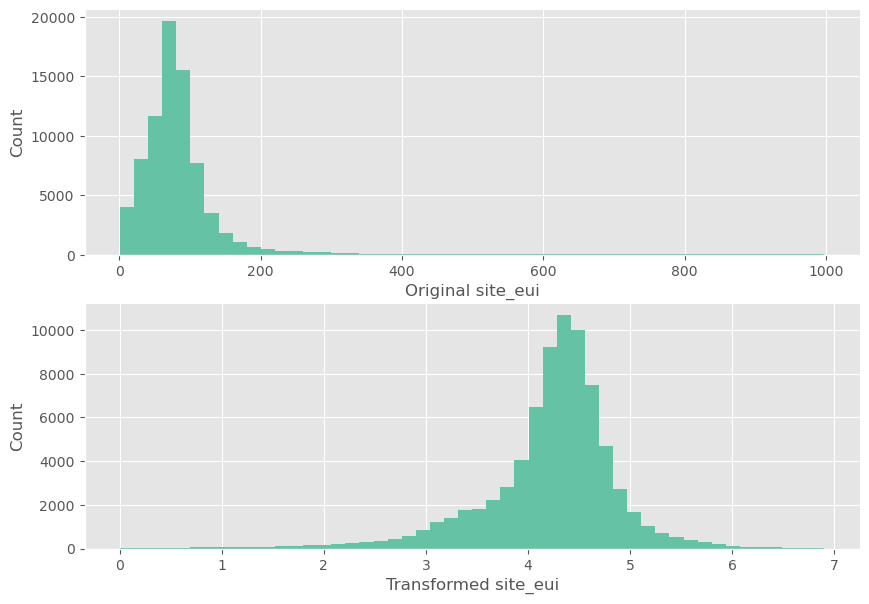

In [37]:
target = 'site_eui'
plt.figure(figsize=(10,7))
# plot the original variable vs sale price    
plt.subplot(2, 1, 1)
train[target].hist(bins=50)
plt.ylabel('Count')
plt.xlabel('Original ' + target)

# plot transformed variable vs sale price
plt.subplot(2, 1, 2)
np.log(train[target]).hist(bins=50)
plt.ylabel('Count')
plt.xlabel('Transformed ' + target);

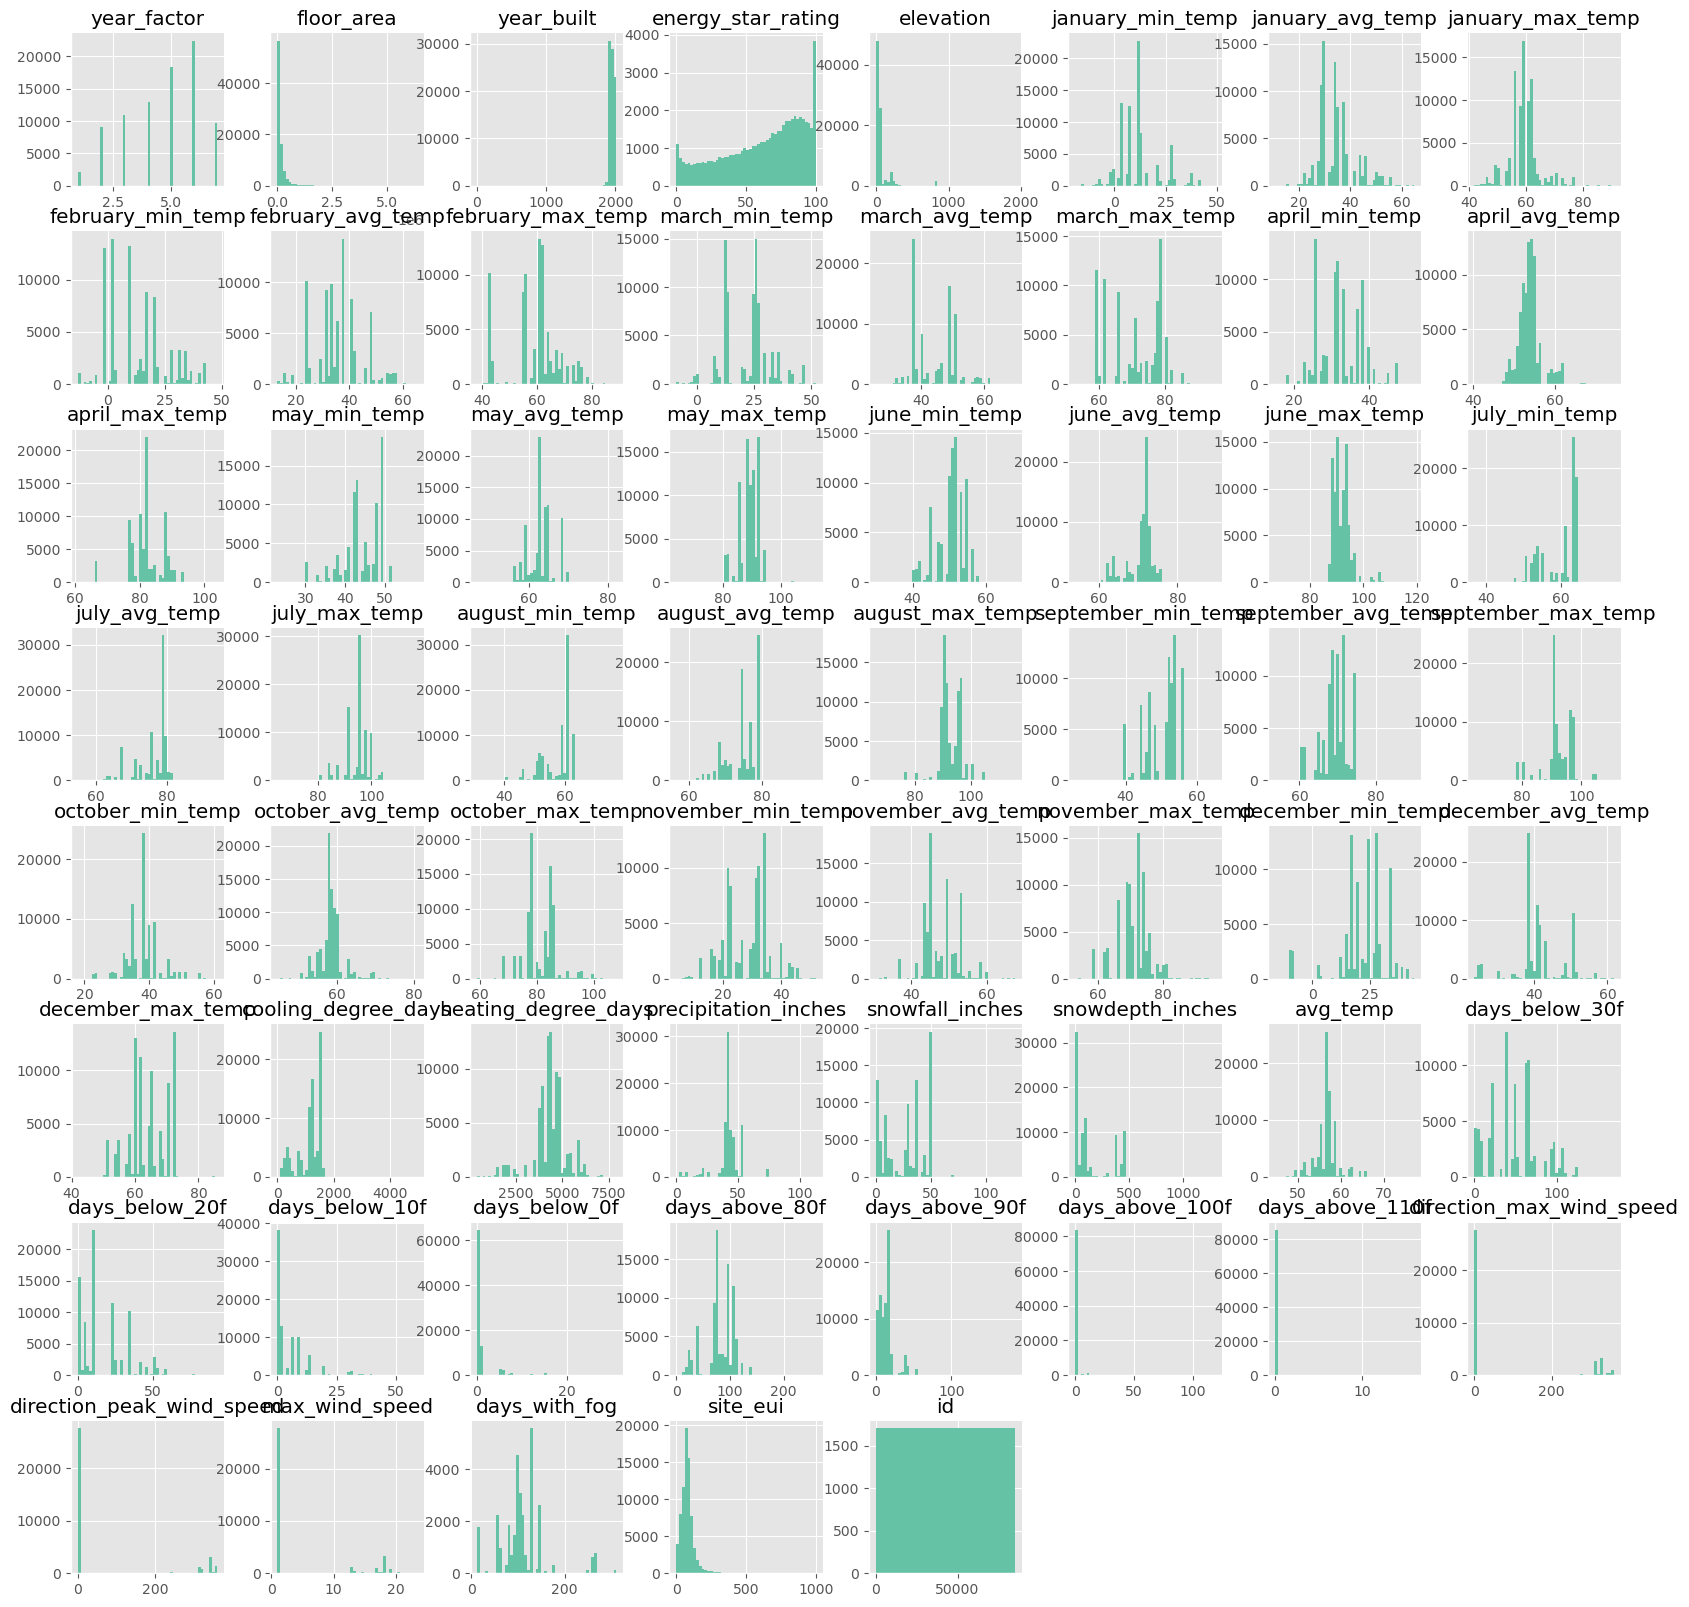

In [38]:
nums = df_train.loc[:, df_train.dtypes != 'object'].columns
df_all[nums].hist(bins=50, figsize=(20,20))
plt.show();

In [39]:
df_all[nums].skew().sort_values(key=abs, ascending=False)[:5]

days_above_110f    89.873857
days_above_100f    24.615438
year_built        -11.706906
floor_area          6.701786
elevation           5.140444
dtype: float64

Binarize very skewed variables

In [72]:
skewed = ['days_above_110f', 'days_above_100f']

for var in skewed:
    
    # map the variable values into 0 and 1
    df_all[var] = np.where(df_all[var]==0, 0, 1)

### Saving feature dataset

In [17]:
saved = True
if saved:
    data_path = 'data/feature_transformed_set.pkl'
    with open(data_path, "rb") as fh:
        df_all = pickle.load(fh)
else:
    df_all.to_pickle('data/feature_transformed_set.pkl')

In [18]:
df_all.shape

(85462, 93)

# Baseline Modeling

In [20]:
cats = ['state_factor', 'facility_type', 'building_class', 'days_above_100f', 'days_above_110f']

# typecasting numerical features
for col in df_all.drop(columns=cats + ['dataset', 'id', 'site_eui']).columns:
    df_all[col] = df_all[col].astype('float64')

In [19]:
train = df_all[df_all['dataset']=='train']
test = df_all[df_all['dataset']=='test']

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

test_ids = test['id']
train_ids = train['id']

target = train['site_eui'] #y_train

train = train.drop(['id', 'dataset', 'site_eui'], axis=1) #X_train
test = test.drop(['id', 'dataset', 'site_eui'], axis=1) #X_test

In [22]:
# get discrete end categorical features colums indexes 
# needed later for the cat bosst model
cats_discrete_idx = np.where(train.dtypes != 'float64')[0]

In [20]:
y_test = pd.read_csv('data/y_test.csv')

X_train = train
X_test = test
y_train = target
y_test = y_test['site_eui']
print('Train: ', X_train.shape)
print('Test:', X_test.shape)
print('Samples: ', y_train.shape)
print('Targets: ', y_test.shape)

Train:  (75757, 90)
Test: (9705, 90)
Samples:  (75757,)
Targets:  (9705,)


Using a Dict Vectorizer to Transform the Categorical Variables

In [32]:
def vectorize(df):

    dicts = df.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    df = dv.fit_transform(dicts)

    return dv, df

In [34]:
def predict(df, dv, model):
    dicts = df.to_dict(orient='records')
    X = dv.transform(dicts)
    y_pred = model.predict(X)

    return y_pred

### Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = predict(X_test,lr)


In [11]:
print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 Training data scores
 --------------------
 RMSE: 90.42368673110525
 MAE: 67.09721969795483
 MSE: 8176.44312204506
 R2: -1.2613861703278175


### Catboost

In [13]:
catb = CatBoostRegressor(iterations=500,
                         learning_rate=0.02,
                         depth=12,
                         eval_metric='RMSE',
#                         early_stopping_rounds=42,
                         random_seed = 23,
                         bagging_temperature = 0.2,
                         od_type='Iter',
                         metric_period = 75,
                         od_wait=100)

In [32]:
catb.fit(X_train, y_train,
                 eval_set=(dv.transform(X_test.to_dict(orient='records')),y_test),
                 use_best_model=True,
                 verbose=True)



0:	learn: 57.8814967	test: 61.1757616	best: 61.1757616 (0)	total: 274ms	remaining: 2m 16s
75:	learn: 46.3884931	test: 66.4699493	best: 61.1757616 (0)	total: 20.6s	remaining: 1m 55s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 61.17576162
bestIteration = 0

Shrink model to first 1 iterations.


In [34]:
y_pred = predict(X_test,catb)

In [35]:
print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 Training data scores
 --------------------
 RMSE: 61.175761645013964
 MAE: 40.267346264528456
 MSE: 3742.473812847562
 R2: -0.03506847621422904


### XGBoost

In [36]:
xgb = XGBRegressor(n_estimators=500, reg_alpha=0.01, n_jobs=-1)
xgb.fit(X_train, y_train)
y_pred = predict(X_test,xgb)

In [37]:
print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 Training data scores
 --------------------
 RMSE: 90.15286831808925
 MAE: 60.74215808070236
 MSE: 8127.53966597874
 R2: -1.2478607782252982


### RandomForest

In [38]:
rf = RandomForestRegressor(random_state=1, criterion='squared_error', max_depth = 15, min_samples_split= 2)
rf.fit(X_train, y_train)
y_pred = predict(X_test,rf)

In [39]:
print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 Training data scores
 --------------------
 RMSE: 75.0388312987652
 MAE: 48.7018275141252
 MSE: 5630.826202684543
 R2: -0.5573364007068984


# Model Evaluation

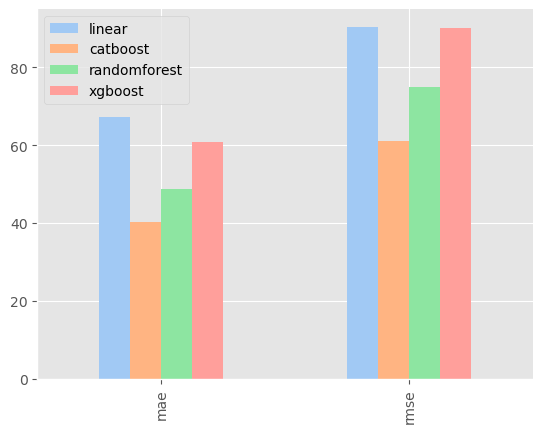

In [40]:
error_rec = {
    
    "linear": {
        "mae": 67.09721969795483,
        "rmse": 90.42368673110525,
    },

    "catboost": {
        "mae": 40.267346264528456,
        "rmse": 61.175761645013964,
    },
    "randomforest": {
        "mae": 48.7018275141252,
        "rmse":  75.0388312987652,
    },
    "xgboost": {
        "mae": 60.74215808070236,
        "rmse": 90.15286831808925,
    },
}
pd.DataFrame(error_rec).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[0], 
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3]]);

Saving RF and CatBoost Models before Hypertuning

In [42]:
with open('models/rf_untuned.pkl', 'wb') as f:
    pickle.dump((dv,rf), f)

with open('models/catb_untuned.pkl', 'wb') as f:
    pickle.dump((dv,catb),f)

Loading Models

In [2]:
rf_model = 'models/rf_untuned.pkl'
catb_model = 'models/catb_untuned.pkl'

In [3]:
with open(rf_model, 'rb') as f_in: 
    dv, rf_model = pickle.load(f_in)

with open(catb_model, 'rb') as f_in: 
    dv, catb_model = pickle.load(f_in)

# Hyperparameter Tuning

### Using CrossValidation on CatBoost

In [35]:
# prepaere the out of folds predictions 
scores = []

NUM_FOLDS = 5
kf = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kf.split(train, target):
    X_train, X_val = train.iloc[train_idx], train.iloc[val_idx]
    y_train, y_val = target[train_idx], target[val_idx]

    dv, X_train = vectorize(X_train)
    
#     catb = CatBoostRegressor(iterations=500,
#                          learning_rate=0.02,
#                          depth=12,
#                          eval_metric='RMSE',
# #                         early_stopping_rounds=42,
#                          random_seed = 23,
#                          bagging_temperature = 0.2,
#                          od_type='Iter',
#                          metric_period = 75,
#                          od_wait=100)
    # train model
    model = catb_model.fit(X_train, y_train,
                 eval_set=(dv.transform(X_val.to_dict(orient='records')),y_val),
                 use_best_model=True,
                 verbose=True)

    y_pred = predict(X_val, dv, model)
    rmse = mean_squared_error(y_pred, y_val, squared=False)
    scores.append(rmse)
          
print(' %.3f +- %.3f' % (np.mean(scores), np.std(scores)))


0:	learn: 57.9849525	test: 57.4903556	best: 57.4903556 (0)	total: 259ms	remaining: 2m 9s
75:	learn: 46.7164585	test: 46.8248240	best: 46.8248240 (75)	total: 19.2s	remaining: 1m 46s
150:	learn: 43.8145455	test: 44.4683293	best: 44.4683293 (150)	total: 38s	remaining: 1m 27s
225:	learn: 42.2643963	test: 43.5459345	best: 43.5459345 (225)	total: 56.9s	remaining: 1m 8s
300:	learn: 41.1690238	test: 42.9897292	best: 42.9897292 (300)	total: 1m 15s	remaining: 50.1s
375:	learn: 40.3069114	test: 42.6640077	best: 42.6640077 (375)	total: 1m 34s	remaining: 31.2s
450:	learn: 39.5756873	test: 42.4223884	best: 42.4223884 (450)	total: 1m 53s	remaining: 12.3s
499:	learn: 39.1364886	test: 42.2610862	best: 42.2610862 (499)	total: 2m 6s	remaining: 0us

bestTest = 42.2610862
bestIteration = 499



0:	learn: 57.8165212	test: 58.1486212	best: 58.1486212 (0)	total: 258ms	remaining: 2m 8s
75:	learn: 46.3521056	test: 47.6611285	best: 47.6611285 (75)	total: 19.6s	remaining: 1m 49s
150:	learn: 43.4101789	test: 45.5516611	best: 45.5516611 (150)	total: 41s	remaining: 1m 34s
225:	learn: 41.8503682	test: 44.6893022	best: 44.6893022 (225)	total: 1m 2s	remaining: 1m 15s
300:	learn: 40.7169322	test: 44.1776243	best: 44.1776243 (300)	total: 1m 21s	remaining: 54.1s
375:	learn: 39.8352638	test: 43.8048312	best: 43.8048312 (375)	total: 1m 40s	remaining: 33.3s
450:	learn: 39.0312877	test: 43.5641885	best: 43.5641885 (450)	total: 2m	remaining: 13.1s
499:	learn: 38.5205122	test: 43.4339525	best: 43.4339525 (499)	total: 2m 12s	remaining: 0us

bestTest = 43.43395252
bestIteration = 499



0:	learn: 57.6839966	test: 58.6850001	best: 58.6850001 (0)	total: 256ms	remaining: 2m 7s
75:	learn: 46.1754399	test: 48.5165067	best: 48.5165067 (75)	total: 19.6s	remaining: 1m 49s
150:	learn: 43.3102135	test: 46.3247652	best: 46.3247652 (150)	total: 38.9s	remaining: 1m 29s
225:	learn: 41.7183278	test: 45.2969309	best: 45.2969309 (225)	total: 58.1s	remaining: 1m 10s
300:	learn: 40.6382043	test: 44.7219940	best: 44.7219940 (300)	total: 1m 17s	remaining: 51.1s
375:	learn: 39.7951575	test: 44.3776129	best: 44.3776129 (375)	total: 1m 36s	remaining: 31.8s
450:	learn: 39.0413617	test: 44.0881959	best: 44.0881959 (450)	total: 1m 55s	remaining: 12.5s
499:	learn: 38.5831604	test: 43.9440896	best: 43.9440896 (499)	total: 2m 8s	remaining: 0us

bestTest = 43.94408961
bestIteration = 499



0:	learn: 58.2330710	test: 56.4777077	best: 56.4777077 (0)	total: 258ms	remaining: 2m 8s
75:	learn: 46.8051963	test: 45.8674617	best: 45.8674617 (75)	total: 19.7s	remaining: 1m 49s
150:	learn: 43.8120484	test: 43.8440572	best: 43.8440572 (150)	total: 38.8s	remaining: 1m 29s
225:	learn: 42.1414107	test: 43.0649730	best: 43.0649730 (225)	total: 57.9s	remaining: 1m 10s
300:	learn: 40.9561281	test: 42.6355142	best: 42.6355142 (300)	total: 1m 17s	remaining: 50.9s
375:	learn: 40.0203698	test: 42.3311563	best: 42.3311563 (375)	total: 1m 36s	remaining: 31.7s
450:	learn: 39.1996653	test: 42.1168136	best: 42.1168136 (450)	total: 1m 55s	remaining: 12.5s
499:	learn: 38.6875638	test: 41.9769721	best: 41.9769721 (499)	total: 2m 7s	remaining: 0us

bestTest = 41.97697213
bestIteration = 499



0:	learn: 57.7055674	test: 58.6323933	best: 58.6323933 (0)	total: 257ms	remaining: 2m 8s
75:	learn: 46.4642140	test: 47.6758733	best: 47.6758733 (75)	total: 19.7s	remaining: 1m 49s
150:	learn: 43.5781017	test: 45.3007314	best: 45.3007314 (150)	total: 38.9s	remaining: 1m 29s
225:	learn: 42.1051779	test: 44.4591938	best: 44.4591938 (225)	total: 58.1s	remaining: 1m 10s
300:	learn: 41.0405533	test: 43.8662592	best: 43.8662592 (300)	total: 1m 17s	remaining: 51.1s
375:	learn: 40.1859950	test: 43.5225642	best: 43.5225642 (375)	total: 1m 36s	remaining: 31.8s
450:	learn: 39.4330206	test: 43.2574883	best: 43.2574883 (450)	total: 1m 55s	remaining: 12.6s
499:	learn: 38.9839583	test: 43.0924279	best: 43.0924279 (499)	total: 2m 8s	remaining: 0us

bestTest = 43.09242787
bestIteration = 499

 42.942 +- 0.730


### Using Optuna with Random Forest

In [36]:
# cross validating training data
kfolds = KFold(n_splits=3, shuffle=True, random_state=42)

# Objective function
def random_forest_objective(trial, data=X_train, target=y_train):
    # Dictionary to store best parameters
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 5, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "max_features": trial.suggest_float("max_features", 0.01, 0.95)
    }
     
    model = RandomForestRegressor(**param)
    
    # Setting random seed and kfolds for cross-validation
    kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
    
    scores = cross_val_score(model, data, target, cv=kfolds, scoring="neg_root_mean_squared_error")
    return scores.mean()

In [37]:
def tuner(objective, n=5, direction='minimize'): 
    # Create Study object
    study = optuna.create_study(direction="minimize")

    # Optimize the study
    study.optimize(objective, n_trials=n)

    # Print the result
    best_params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}")
    print(f"Optimized parameters: {best_params}\n")
    print("<<<<<<<<<< Tuning complete... >>>>>>>>>>")
    
    # Return best parameters for the model
    return best_params, best_score

In [38]:
%%time
rf_param, rf_score = tuner(random_forest_objective,1)
rf_tuned_model = RandomForestRegressor(**rf_param)

[I 2023-11-14 17:14:12,583] A new study created in memory with name: no-name-fd04eda3-f5c4-425e-9c62-412c6cc833f5
[I 2023-11-14 17:22:24,971] Trial 0 finished with value: -47.126613308432255 and parameters: {'n_estimators': 286, 'max_depth': 8, 'min_samples_split': 8, 'max_features': 0.18287852262013604}. Best is trial 0 with value: -47.126613308432255.


Best score: -47.126613308432255
Optimized parameters: {'n_estimators': 286, 'max_depth': 8, 'min_samples_split': 8, 'max_features': 0.18287852262013604}

<<<<<<<<<< Tuning complete... >>>>>>>>>>
CPU times: user 8min 11s, sys: 102 ms, total: 8min 11s
Wall time: 8min 12s


In [39]:
rf_tuned_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=0.18287852262013604,
                      min_samples_split=8, n_estimators=286)

Text(0.5, 0, 'iteration')

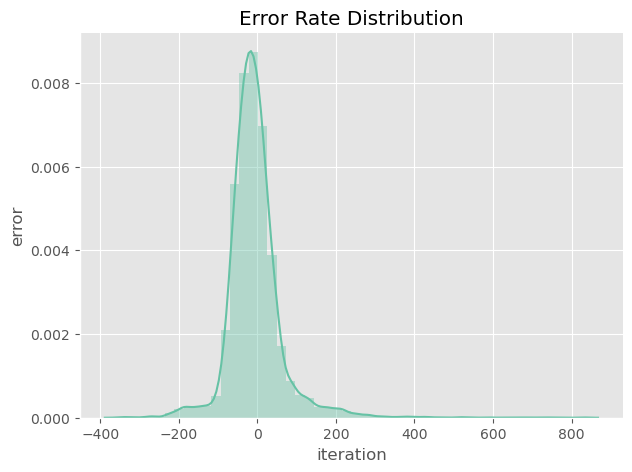

In [40]:
y_hat_tuned = predict(X_test, dv, catb_model)

plt.figure(figsize = (7,5))
sns.distplot(y_test - y_hat_tuned)
plt.title("Error Rate Distribution");
plt.ylabel("error")
plt.xlabel("iteration")

Text(0.5, 0, 'iteration')

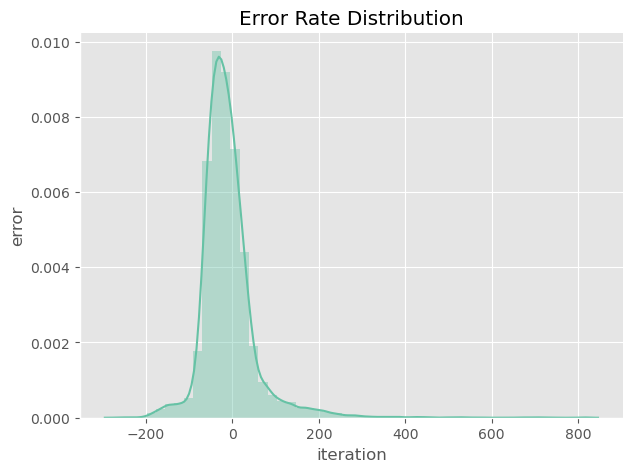

In [41]:
y_hat_tuned = predict(X_test, dv, rf_tuned_model)

plt.figure(figsize = (7,5))
sns.distplot(y_test - y_hat_tuned)
plt.title("Error Rate Distribution");
plt.ylabel("error")
plt.xlabel("iteration")

### Saving Models

In [42]:
with open('models/rf_tuned_final.pkl', 'wb') as f:
    pickle.dump((dv, rf_tuned_model), f)

with open('models/catb_tuned_final.pkl', 'wb') as f:
    pickle.dump((dv, catb_model),f)

In [20]:
## Load catboost models here
load = True
if load:
    with open('models/catb_tuned_final.pkl', 'rb') as f:
        dv, model = pickle.load(f)

In [21]:
model